# Trabajo Practico Nº2. Ejercicio 3

## Fuzzy Logic con péndulo


### Introduccion

Se plantea realizar un controlador Fuzzy o controlador difuso para controlar el desplazamiento angular de un péndulo invertido. La idea es mantener el pendulo en orientación vertical. Las consignas son las siguientes:
Implementar un sistema de inferencia difusa para controlar un péndulo invertido 
1. Asuma que el carro no tiene espacio restringido para moverse
2. Definir variables lingüísticas de entrada y salida, particiones borrosas, operaciones borrosas para la conjunción, disyunción e implicación, reglas de inferencia (cubrir todas las posibles combinaciones de valores borrosos de entrada en la base de reglas)
3. Utilice el siguiente modelo del sistema carro-péndulo

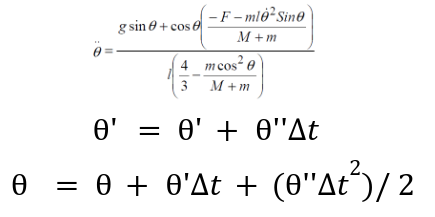 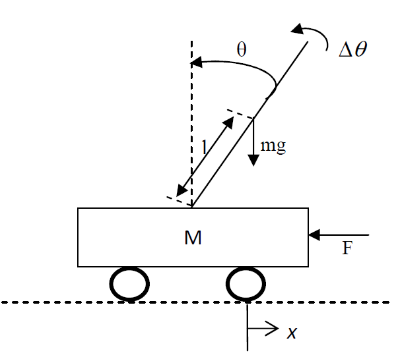


Lo que haremos en primer lugar es importar las librerias necesarias para el desarrollo del ejercicio.

### Importacion de librerias

In [411]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product #Usado para crear las posibles combinaciones de reglas
from scipy import constants #Obtenemos la constante de la gravedad

### Definicion de variables de entrada, salida y conjuntos difusos

Lo que hacemos primero es crear una funcion que, al pasarle un valor extremo en el que se encuentre el angulo del pendulo y un cierto numero de puntos en los que discretizaremos la funcion de pertenencia, nos devuelva una lista de listas, en el que cada elemento corresponda a una funcion de pertenecia discretizada con el 

In [412]:
#Para ello vamos a crear funcion que me permita asignar una funcion de pertenencia a cada variable

def crearFuncionPertenencia(valorExtremo,valoresAbscisas):
    
    rango=2*valorExtremo
    numeroConjuntos=5; #Numero de conjuntos difusos. En este caso usaremos NG,NP,Z,PP,PG
    pasoConjunto=rango/(numeroConjuntos-1)
    #Hallamos los picos y los colocamos en una lista
    picos=[-valorExtremo]
    for i in range(1,numeroConjuntos): #Esto se recorrera de 0 a 4, es decir, 5 veces
        picos.append(picos[i-1]+pasoConjunto)

    #Ahora que tenemos los picos, generamos un vector que sera el eje de abcisas de nuestra funcion de pertenencia
    ejeX=valoresAbscisas
    #Ahora generamos las funciones de pertenencia
    #Utilizaremos funciones triangulares y hombro izquierdo y derecho
    
    funcionesPertenencia=[]
    for i in range(numeroConjuntos):
        funcionesPertenencia.append([]) #Agregamos una lista vacia para cada conjunto difuso
    for conjunto in range(numeroConjuntos):
        for valor in ejeX:
            if valor <= picos[conjunto] - pasoConjunto or valor >= picos[conjunto] + pasoConjunto:
                funcionesPertenencia[conjunto].append(0)
            elif picos[conjunto]-pasoConjunto<= valor <= picos[conjunto]:
                funcionesPertenencia[conjunto].append((valor - (picos[conjunto] - pasoConjunto)) / pasoConjunto)
            elif picos[conjunto]<= valor <= picos[conjunto]+pasoConjunto:
                funcionesPertenencia[conjunto].append((picos[conjunto] + pasoConjunto - valor) / pasoConjunto)
            else:
                funcionesPertenencia[conjunto].append(1)

    plt.plot(ejeX,funcionesPertenencia[0])
    plt.plot(ejeX,funcionesPertenencia[1])
    plt.plot(ejeX,funcionesPertenencia[2])
    plt.plot(ejeX,funcionesPertenencia[3])
    plt.plot(ejeX,funcionesPertenencia[4])
    return funcionesPertenencia,picos
    


Ahora generamos las diferentes variables de entrada y salida con sus respectivos conjuntos difusos.

#### Variable de entrada 1: Desplazamiento angular theta

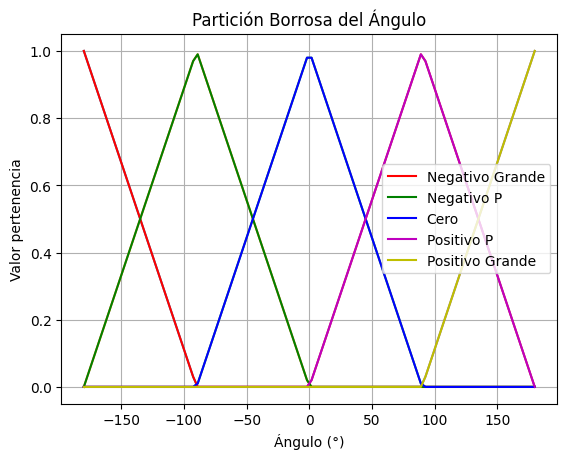

In [413]:
cantidadPuntos=100 #Cantidad de puntos que tendra cada funcion de pertenencia
valorExtremoAngulo=180 #Valor maximo del angulo
angulos=np.linspace(-valorExtremoAngulo,valorExtremoAngulo,cantidadPuntos)
#Obtenemos las respectivas funciones de pertenencia para cada conjunto
funcionesPertenenciaAngulo,picosAngulo=crearFuncionPertenencia(valorExtremoAngulo,angulos)
#Graficamos los conjuntos borrosos
conjuntos = ['Negativo Grande', 'Negativo P','Cero', 'Positivo P', 'Positivo Grande']
colores = ['r', 'g', 'b', 'm', 'y']

for i,funcion in enumerate(funcionesPertenenciaAngulo):
    plt.plot(angulos,funcion,label=conjuntos[i],color=colores[i])

plt.xlabel('Ángulo (°)')
plt.ylabel('Valor pertenencia')
plt.title('Partición Borrosa del Ángulo')
plt.legend()
plt.grid(True)
plt.show()

### Variable de entrada 2: Velocidad angular thetha´

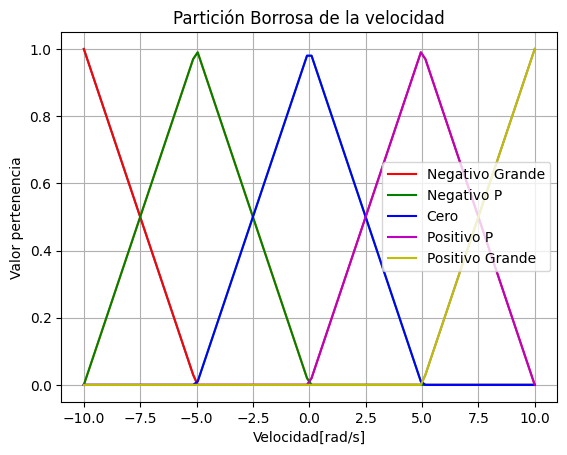

In [414]:
valorExtremoVelocidad=10
#Aca ya no hace falta determinar el numero de puntos porque es el mismo que para el desplazamiento
velocidades=np.linspace(-valorExtremoVelocidad,valorExtremoVelocidad,cantidadPuntos)
#Obtenemos las respectivas funciones de pertenencia para cada conjunto
funcionesPertenenciaVelocidades,picosVelocidad=crearFuncionPertenencia(valorExtremoVelocidad,velocidades)
#Graficamos los conjuntos borrosos
conjuntos = ['Negativo Grande', 'Negativo P','Cero', 'Positivo P', 'Positivo Grande']
colores = ['r', 'g', 'b', 'm', 'y']

for i,funcion in enumerate(funcionesPertenenciaVelocidades):
    plt.plot(velocidades,funcion,label=conjuntos[i],color=colores[i])

plt.xlabel('Velocidad[rad/s]')
plt.ylabel('Valor pertenencia')
plt.title('Partición Borrosa de la velocidad')
plt.legend()
plt.grid(True)
plt.show()

### Variable de Salida: Fuerza

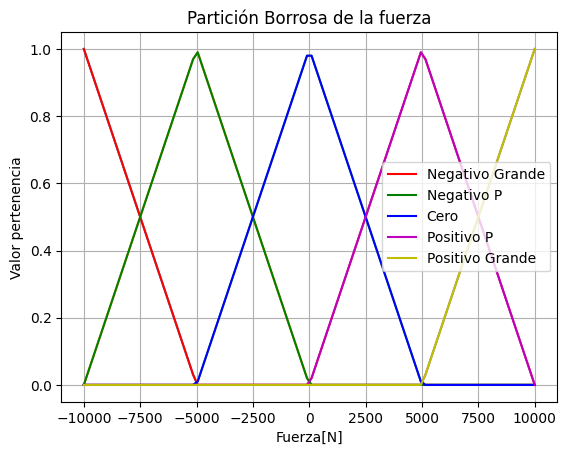

In [415]:
valorExtremoFuerza=10000
#Aca ya no hace falta determinar el numero de puntos porque es el mismo que para el desplazamiento
fuerzas=np.linspace(-valorExtremoFuerza,valorExtremoFuerza,cantidadPuntos)
#Obtenemos las respectivas funciones de pertenencia para cada conjunto
funcionesPertenenciaFuerzas,picosFuerza=crearFuncionPertenencia(valorExtremoFuerza,fuerzas)
#Graficamos los conjuntos borrosos
conjuntos = ['Negativo Grande', 'Negativo P','Cero', 'Positivo P', 'Positivo Grande']
colores = ['r', 'g', 'b', 'm', 'y']

for i,funcion in enumerate(funcionesPertenenciaFuerzas):
    plt.plot(fuerzas,funcion,label=conjuntos[i],color=colores[i])

plt.xlabel('Fuerza[N]')
plt.ylabel('Valor pertenencia')
plt.title('Partición Borrosa de la fuerza')
plt.legend()
plt.grid(True)
plt.show()

## Borrosificador


Ahora lo que debemos hacer es crear un borrosificador que al pasarle cierto valor de entrada, nos entregue su equivalente borrosificado. Para ello haremos uso de las funciones de pertenencia que definimos anteriormente.
Vamos a suponer que se hace uso de un borrosificador Singleton, lo que significa que el valor que le pasemos contendrá un solo valor porsible dado por el conjunto difuso al que pertenece.

En primer lugar haremos un cierto preprocesamiento de los valores de entrada, para evitar cualquier error.
Primero, si el angulo es mayor a 180°, lo pasamos a su equivalente en el intervalo [-180°,180°]
Luego, dado que tenemos una serie de valores discretos, no continuos,debemos poder interpolar los valores tanto de los angulos como de las velocidades, para poder obtener los valores de pertenencia de los mismos.
Estas 2 correcciones las hacemos con la funcion de preproceso de valores

In [416]:
def Preprocesador1 (valorAngulo):
    if valorAngulo > 180:
        valorAngulo-=360
        return valorAngulo
    elif valorAngulo < -180:
        valorAngulo+=360
        return valorAngulo
    else:
        return valorAngulo

In [417]:
def Preprocesador2 (valor, valorExtremo, cantidadPuntos):
    #Con este preprocesador se pretende llevar el valor del angulo a un valor de 0 a 99
    #El cual corresponde al incidice del vector de funciones de pertenencia, que utilizaremos
    #para obtener el valor de pertenencia del valor del angulo
    rangoOriginal=2*valorExtremo
    rangoNuevo=cantidadPuntos-1
    # Calculamos la fracción del valor de origen
    fraccion = (valor - (-valorExtremo)) / rangoOriginal

    # Aplicamos la interpolación lineal
    valorInterpolado = fraccion * rangoNuevo

    # Redondeamos el resultado y lo convertimos a entero
    valorInterpolado = int(round(valorInterpolado))

    # Aseguramos que el valor interpolado esté dentro del rango de destino (0 a n-1)
    valorInterpolado = max(0, min(cantidadPuntos-1, valorInterpolado))
    return valorInterpolado

In [418]:
def Borrosificador (valorAngulo,valorVelocidad):
    
    #Realizamos los correspondientes preprocesamientos
    valorAnguloCorregido=Preprocesador1(valorAngulo)
    valorIndiceAngulo=Preprocesador2(valorAnguloCorregido,valorExtremoAngulo,cantidadPuntos)
    valorIndiceVelocidad=Preprocesador2(valorVelocidad,valorExtremoVelocidad,cantidadPuntos)
    print("Valor angulo preprocesado: ",valorIndiceAngulo)
    print("Valor velocidad preprocesado: ",valorIndiceVelocidad)
    #Obtenemos los valores de pertenencia para cada conjunto
    valoresPertenenciaAngulo=[]
    valoresPertenenciaVelocidad=[]
    for i in range(5):
        valoresPertenenciaAngulo.append(funcionesPertenenciaAngulo[i][valorIndiceAngulo])
        valoresPertenenciaVelocidad.append(funcionesPertenenciaVelocidades[i][valorIndiceVelocidad])
    
    print("Valores Fuzzy angulo: ",valoresPertenenciaAngulo)
    print("Valores Fuzzy velocidad: ",valoresPertenenciaVelocidad)

    return valoresPertenenciaAngulo,valoresPertenenciaVelocidad



    

    
    

Luego de pasar por el borrosificador identificamos que cada variable va a tener un cierto valor de pertenencia en 2 de sus 5 conjuntos difusos. Lo que nos da un total de 4 reglas que pueden armarse en combinacion de los conjuntos difusos de las variables de entrada. Creamos una funcion que arme una lista con los pares de valores de pertenencia y una lista con los pares de conjuntos difusos para cada regla

In [419]:
def creadorDePares (valoresPertenenciaAngulo,valoresPertenenciaVelocidad):
    #Creamos los pares ordenados de valores de pertenencia para cada regla, de manera que no hayan elementos nulos
    paresPertenencia=[]
    paresConjuntos=[]
    for i in range(5):
        for j in range(5):
            if valoresPertenenciaAngulo[i]!=0 and valoresPertenenciaVelocidad[j]!=0:
                paresPertenencia.append([valoresPertenenciaAngulo[i],valoresPertenenciaVelocidad[j]])
                paresConjuntos.append([conjuntos[i],conjuntos[j]])
    return paresPertenencia,paresConjuntos




In [420]:
'''Prueba creador de pares'''
creadorDePares([0,0.2,0,0.8,0.3],[0.1,0,0.8,0.3,0])

([[0.2, 0.1],
  [0.2, 0.8],
  [0.2, 0.3],
  [0.8, 0.1],
  [0.8, 0.8],
  [0.8, 0.3],
  [0.3, 0.1],
  [0.3, 0.8],
  [0.3, 0.3]],
 [['Negativo P', 'Negativo Grande'],
  ['Negativo P', 'Cero'],
  ['Negativo P', 'Positivo P'],
  ['Positivo P', 'Negativo Grande'],
  ['Positivo P', 'Cero'],
  ['Positivo P', 'Positivo P'],
  ['Positivo Grande', 'Negativo Grande'],
  ['Positivo Grande', 'Cero'],
  ['Positivo Grande', 'Positivo P']])

## Motor de inferencia


Una vez borrosificado un valor, utilizamos el motor de inferencia en conjunto con la base de conocimiento (Reglas) para determinar la salida difusa del sistema. Lo primero que vamos a hacer es definir el conjunto de reglas (Base de conocimientos)

### Base de conocimiento (Reglas)

Creamos una funcion que al pasarle el conjunto difuso al que pertenece el angulo y el conjunto difuso al que pertenece la velocidad, nos devuelva el conjunto difuso al que pertenece la fuerza, segun las reglas de inferencia que definiremos a continuación

In [421]:
def evaluarRegla(regla, conjuntoAngulo, conjuntoVelocidad):  # Función para evaluar una regla
    if regla["angulo"] == conjuntoAngulo and regla["v"] == conjuntoVelocidad:
        return regla["fuerza"]
    else:
        return None

In [422]:
'''Defino las reglas a usar en un diccionario'''

reglas = {
    1: {"angulo": "Negativo Grande",    "v": "Negativo Grande",     "fuerza": "Negativo Grande"},
    2: {"angulo": "Negativo Grande",    "v": "Negativo P",      "fuerza": "Negativo Grande"},
    3: {"angulo": "Negativo Grande",    "v": "Cero",                "fuerza": "Negativo Grande"},
    4: {"angulo": "Negativo Grande",    "v": "Positivo P",      "fuerza": "Negativo Grande"},
    5: {"angulo": "Negativo Grande",    "v": "Positivo Grande",     "fuerza": "Cero"},

    6: {"angulo": "Negativo P",     "v": "Negativo Grande",     "fuerza": "Negativo P"},
    7: {"angulo": "Negativo P",     "v": "Negativo P",      "fuerza": "Negativo P"},
    8: {"angulo": "Negativo P",     "v": "Cero",                "fuerza": "Negativo P"},
    9: {"angulo": "Negativo P",     "v": "Positivo P",      "fuerza": "Cero"},
    10: {"angulo": "Negativo P",    "v": "Positivo Grande",     "fuerza": "Cero"},

    11: {"angulo": "Cero",              "v": "Negativo Grande",     "fuerza": "Cero"},
    12: {"angulo": "Cero",              "v": "Negativo P",      "fuerza": "Cero"},
    13: {"angulo": "Cero",              "v": "Cero",                "fuerza": "Cero"},
    14: {"angulo": "Cero",              "v": "Positivo P",      "fuerza": "Cero"},
    15: {"angulo": "Cero",              "v": "Positivo Grande",     "fuerza": "Cero"},

    16: {"angulo": "Positivo P",    "v": "Negativo Grande",     "fuerza": "Cero"},
    17: {"angulo": "Positivo P",    "v": "Negativo P",      "fuerza": "Cero"},
    18: {"angulo": "Positivo P",    "v": "Cero",                "fuerza": "Positivo P"},
    19: {"angulo": "Positivo P",    "v": "Positivo P",      "fuerza": "Positivo P"},
    20: {"angulo": "Positivo P",    "v": "Positivo Grande",     "fuerza": "Positivo P"},

    21: {"angulo": "Positivo Grande",   "v": "Negativo Grande",     "fuerza": "Cero"},
    22: {"angulo": "Positivo Grande",   "v": "Negativo P",      "fuerza": "Positivo Grande"},
    23: {"angulo": "Positivo Grande",   "v": "Cero",                "fuerza": "Positivo Grande"},
    24: {"angulo": "Positivo Grande",   "v": "Positivo P",      "fuerza": "Positivo Grande"},
    25: {"angulo": "Positivo Grande",   "v": "Positivo Grande",     "fuerza": "Positivo Grande"}
}

Ahora que tenemos las reglas y el evaluador de reglas, es preciso obtener los valores de pertenencia salidas difusas para cada regla. Para ello, tomara como parametro la lista de pares de conjuntos difusos y los pares de valores de pertenencia para cada una de las 4 reglas. Luego la funcion llama a la funcion evaluador de reglas para cada una de las reglas y devuelve una lista con el conjunto difuso al que pertenece la fuerza para cada regla. Finalmente:
1. Si el conjunto de salida (concecuente) de 2 o mas reglas son iguales, utilizamos la funcion de maximo (disyuncion) para obtener el conjunto difuso al que pertenece la fuerza
2. Si el conjunto de salida (concecuente) de 2 o mas reglas son diferentes, utilizamos la funcion de minimo (conjuncion) para obtener el consecuente, luego truncamos la respuesta, usando nuevamente el minimo

In [423]:
def salidasFuzzy(paresPertenencia,paresConjuntos):
    #Reviso las reglas y creo un vector cuyos elementos sean los conjuntos difusos de las fuerzas
    conjuntosFuerza=[]
    for parConjunto in paresConjuntos:
        for i in range(25):
            fuerza=evaluarRegla(reglas[i+1],parConjunto[0],parConjunto[1])
            if fuerza!=None:
                conjuntosFuerza.append(fuerza)
    print("Conjuntos de fuerza: ",conjuntosFuerza)
    #Hallamos el minimo de cada par de pertenencia y lo guardamos en un vector
    conjuncionEntradas=[]
    for parPertenencia in paresPertenencia:
        conjuncionEntradas.append(min(parPertenencia))
    print("Conjuncion de entradas: ",conjuncionEntradas)
    #Ahora revisamos los conjuntos de fuerza. Si ninguno se repite, el valor de pertenencia pasa directo
    #Si hay repetidos, se hace la disyuncion de esos que se repiten, es decir, pasa el maximo de esos valores
    #Se guarda en un vector
    pertenenciaSalidas=[]
    nuevoConjuntoFuerza=[]
    for conjuntoFuerza in conjuntosFuerza:
        indice=conjuntosFuerza.index(conjuntoFuerza)
        if conjuntosFuerza.count(conjuntoFuerza)==1:
            pertenenciaSalidas.append(conjuncionEntradas[indice])
            nuevoConjuntoFuerza.append(conjuntoFuerza)
        else:
            if conjuntoFuerza not in nuevoConjuntoFuerza:
                maximos=[]
                for conjuntoFuerza2 in conjuntosFuerza:
                    indice2=conjuntosFuerza.index(conjuntoFuerza2)
                    if conjuntoFuerza2==conjuntoFuerza:
                        maximos.append(conjuncionEntradas[indice2])
                pertenenciaSalidas.append(max(maximos))
                
                nuevoConjuntoFuerza.append(conjuntoFuerza)
        
        
     #   if i!=len(conjuntosFuerza)-1:
      #      if conjuntoFuerza != conjuntosFuerza[i+1]:
       #         pertenenciaSalidas.append(conjuncionEntradas[i])
        #    else:
         #       pertenenciaSalidas.append(max(conjuncionEntradas[i],conjuncionEntradas[i+1]))
                
        #else:
         #   if conjuntoFuerza != conjuntosFuerza[i-1]:
          #      pertenenciaSalidas.append(conjuncionEntradas[i])
           # else:
            #    pertenenciaSalidas.append(max(conjuncionEntradas[i],conjuncionEntradas[i-1]))
    
    return pertenenciaSalidas,nuevoConjuntoFuerza





In [424]:
'''Prueba salida fuzzy'''
salidasFuzzy([[0.2, 0.1],
  [0.2, 0.8],
  [0.2, 0.3],
  [0.8, 0.1],
  [0.8, 0.8],
  [0.8, 0.3],
  [0.3, 0.1],
  [0.3, 0.8],
  [0.3, 0.3]],[['Negativo P', 'Negativo Grande'],
  ['Negativo P', 'Cero'],
  ['Negativo P', 'Positivo P'],
  ['Positivo P', 'Negativo Grande'],
  ['Positivo P', 'Cero'],
  ['Positivo P', 'Positivo P'],
  ['Positivo Grande', 'Negativo Grande'],
  ['Positivo Grande', 'Cero'],
  ['Positivo Grande', 'Positivo P']])

Conjuntos de fuerza:  ['Negativo P', 'Negativo P', 'Cero', 'Cero', 'Positivo P', 'Positivo P', 'Cero', 'Positivo Grande', 'Positivo Grande']
Conjuncion de entradas:  [0.1, 0.2, 0.2, 0.1, 0.8, 0.3, 0.1, 0.3, 0.3]


([0.1, 0.2, 0.8, 0.3], ['Negativo P', 'Cero', 'Positivo P', 'Positivo Grande'])

## Desborrocificacion


El ultimo paso de un controlador Fuzzy es el proceso de Desborrocificacion, donde se pasan los valores fuzzy de pertenencia de la salida a un valor nitido nuevamente, como eran originalmente los de la salida.
Para esto haremos uso de un desborrocificador por media de centros


Para hacer uso de este desborrocificador no se utilizan los picos anteriormente definidos, sino que se utilizan los centros de los conjuntos difusos de respuesta, en los cuales se tendra uno por cada regla. Por ejemplo, en nuestro caso podriamos tener 8 reglas pero solo 5 conjuntos borrosos de la fuerza, por lo que nos dara error.
Debemos generar el vector de picos de los conjuntos difusos de respuesta

In [425]:
def calculaPicosRespuesta(conjuntosRespuesta):
    picosRespuesta = []

    for conjunto in conjuntosRespuesta:
        if conjunto == 'Negativo Grande':
            picosRespuesta.append(picosFuerza[0])
        elif conjunto == 'Negativo P':
            picosRespuesta.append(picosFuerza[1])
        elif conjunto == 'Cero':
            picosRespuesta.append(picosFuerza[2])
        elif conjunto == 'Positivo P':
            picosRespuesta.append(picosFuerza[3])
        elif conjunto == 'Positivo Grande':
            picosRespuesta.append(picosFuerza[4])
    
    return picosRespuesta

In [426]:
def Desborrocificador(picosFuerza,salidasFuzzy):

    # print(picos_resultados)
    # print(valores_pertenencia)
    print(salidasFuzzy)
    mediaCentros = np.average(picosFuerza, weights=salidasFuzzy)
    #print(f"La fuerza desborrosificada tiene un valor de {media_centros:0.3} N")

    return mediaCentros

Desborrocificador([-10000, -5000.0, 0.0, 5000.0, 10000.0],[0.25, 0.3, 0.7, 0.7, 0.1])

[0.25, 0.3, 0.7, 0.7, 0.1]


243.90243902439028

## Funcion de calculo de fuerza (Funcion Final)

Con esta funcion ejecutamos todas las demas funciones para calcular la fuerza necesaria. Esta funcion es llamada por la funcion de simulacion del pendulo

In [427]:
def calculaFuerza(valorAngulo,valorVelocidad):
    #Ejecutamos la funcion de Borrosificador
    valoresPertenenciaAngulo,valoresPertenenciaVelocidad=Borrosificador(valorAngulo,valorVelocidad)
    #Ejecutamos la funcion de creador de pares
    paresPertenencia,paresConjuntos=creadorDePares(valoresPertenenciaAngulo,valoresPertenenciaVelocidad)
    #Ejecutamos la funcion de salidas difusas
    respuestaDifusa,conjuntoRespuesta=salidasFuzzy(paresPertenencia,paresConjuntos)
    #Ejecutamos la funcion de calculo de picos
    picosRespuesta=calculaPicosRespuesta(conjuntoRespuesta)
    #Ejecutamos la funcion de desborrosificador y obtenemos la fuerza
    fuerza=Desborrocificador(picosRespuesta,respuestaDifusa)
    return fuerza
    

## Modelo matemático

Finalmente utilizamos el modelo matematico del pendulo y le aplicamos la funcion de calculo de la fuerza

## Constantes

In [428]:
CONSTANTE_M = 2 # Masa del carro
CONSTANTE_m = 1 # Masa de la pertiga
CONSTANTE_l = 1 # Longitud dela pertiga

## Funciones del modelo

In [429]:
def simular(t_max, delta_t, theta_0, v_0, a_0):
  theta = (theta_0 * np.pi) / 180
  v = v_0
  a = a_0
  F = calculaFuerza(theta_0, v_0)

  # Simular
  acel_angulares = []
  vel_angulares = []
  fuerzas = []
  y = []
  x = np.arange(0, t_max, delta_t)
  for t in x:

    a = calcula_aceleracion(theta, v, F)
    acel_angulares.append(a)

    v = v + a * delta_t
    vel_angulares.append(v)
    
    theta = theta + v * delta_t + a * np.power(delta_t, 2) / 2
    y.append(theta*180/np.pi)

    F = calculaFuerza(theta*180/np.pi, v)
    fuerzas.append(F)

  #print(f'Vmax={max(velocidades)} --- Vmin={min(velocidades)}')

  return y, x, acel_angulares, vel_angulares, fuerzas


# Calcula la aceleracion en el siguiente instante de tiempo dado el angulo y la velocidad angular actual, y la fuerza ejercida
def calcula_aceleracion(theta, v, F):
    numerador = constants.g * np.sin(theta) + np.cos(theta) * ((-F - CONSTANTE_m * CONSTANTE_l * np.power(v, 2) * np.sin(theta)) / (CONSTANTE_M + CONSTANTE_m))
    denominador = CONSTANTE_l * (4/3 - (CONSTANTE_m * np.power(np.cos(theta), 2) / (CONSTANTE_M + CONSTANTE_m)))
    return numerador / denominador


def graficar(x,y, acel_angulares, vel_angulares, fuerzas):
  
  # Configuración del tamaño de las gráficas y el orden
  figsize = (10, 8)  # Tamaño de la figura (ancho, alto)
 
  # Crear la figura y las subtramas
  fig, axs = plt.subplots(4, 1, figsize=(10, 15))

  i=0
  j=2
  k=3
  h=1

  # Subtrama 1
  axs[i].plot(x, y, color='r')
  axs[i].set_title('Ángulo en el tiempo')
  axs[i].set_xlabel('t [s]')
  axs[i].set_ylabel('Theta [°]')
  axs[i].grid(True)

  # Subtrama 2
  axs[j].plot(x, acel_angulares, color='b')
  axs[j].set_title('Aceleración angular en el tiempo')
  axs[j].set_xlabel('t [s]')
  axs[j].set_ylabel('Alfa [rad/s^2]')
  axs[j].grid(True)

  # Subtrama 3
  axs[k].plot(x, vel_angulares, color='m')
  axs[k].set_title('Velocidad angular en el tiempo')
  axs[k].set_xlabel('t [s]')
  axs[k].set_ylabel('Omwga [rad/s]')
  axs[k].grid(True)

  # Subtrama 4
  axs[h].plot(x, fuerzas, color='g')
  axs[h].set_title('Fuerza en el tiempo')
  axs[h].set_xlabel('t [s]')
  axs[h].set_ylabel('F [N]')
  axs[h].grid(True)

  # Ajustar el espaciado entre las subtramas
  plt.tight_layout()

  # Mostrar el gráfico
  plt.show()


## Simulación

Valor angulo preprocesado:  50
Valor velocidad preprocesado:  50
Valores Fuzzy angulo:  [0, 0, 0.9797979797979799, 0.020202020202020145, 0]
Valores Fuzzy velocidad:  [0, 0, 0.9797979797979799, 0.020202020202020065, 0]
Conjuntos de fuerza:  ['Cero', 'Cero', 'Positivo P', 'Positivo P']
Conjuncion de entradas:  [0.9797979797979799, 0.020202020202020065, 0.020202020202020145, 0.020202020202020065]
[0.9797979797979799, 0.020202020202020145]
Valor angulo preprocesado:  50
Valor velocidad preprocesado:  49
Valores Fuzzy angulo:  [0, 0, 0.9797979797979799, 0.020202020202020145, 0]
Valores Fuzzy velocidad:  [0, 0.020202020202020065, 0.9797979797979799, 0, 0]
Conjuntos de fuerza:  ['Cero', 'Cero', 'Cero', 'Positivo P']
Conjuncion de entradas:  [0.020202020202020065, 0.9797979797979799, 0.020202020202020065, 0.020202020202020145]
[0.020202020202020065, 0.020202020202020145]
Valor angulo preprocesado:  50
Valor velocidad preprocesado:  45
Valores Fuzzy angulo:  [0, 0, 0.9797979797979799, 0.0202020

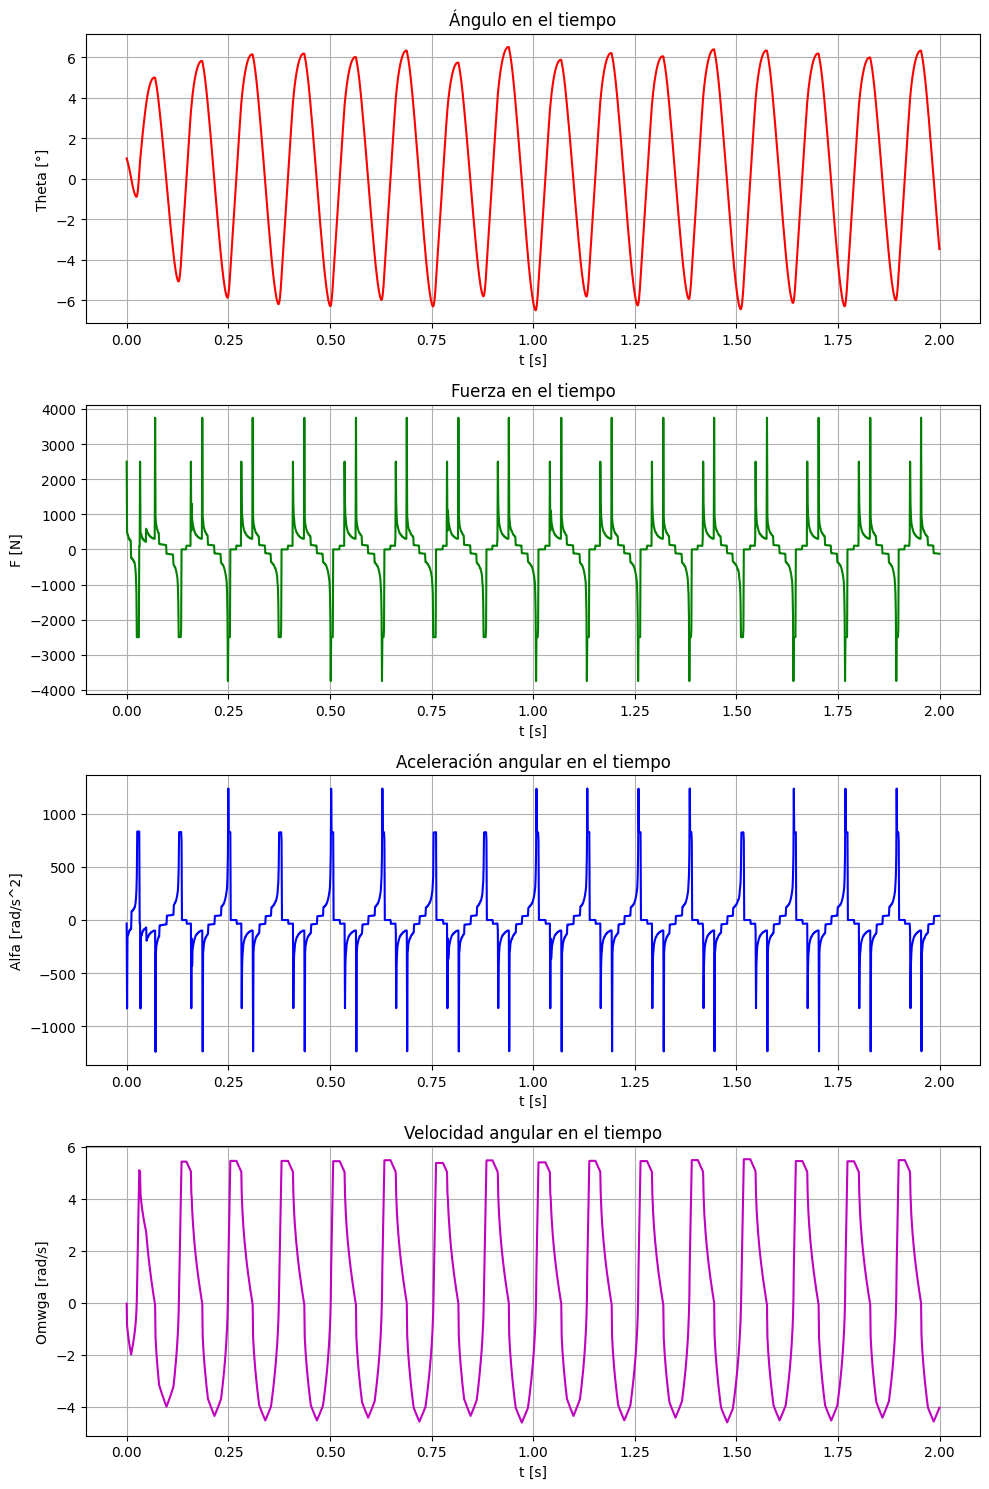

In [431]:
delta_t = 0.001
t_max = 2
theta_0 = 1
v_0 = 0
a_0 = 0

y, x, acel_angulares, vel_angulares, fuerzas= simular(t_max = t_max,
                                             delta_t = delta_t,
                                             theta_0 = theta_0,
                                             v_0 = v_0,
                                             a_0 = a_0)

graficar(x, y, acel_angulares, vel_angulares, fuerzas)